# Feature Correlation Analysis
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1seiNnz4u7Rd3N-5Sxnf6RoP06xklYGWc?usp=sharing)
This notebook analyzes the correlation between features and target variables for each supervised learning model.
This helps identify which features may have weak predictive power and could be dropped before training.

## Models Analyzed:
1. Early Warning System - 1st Semester (4-class classification)
2. Early Warning System - 1st Year (4-class classification)
3. Semester Probation Prediction (binary classification)
4. Academic Recovery Prediction (binary classification)
5. Next Semester GPA Change (regression)
6. STEM Course Success Prediction (binary classification)

## 1. Setup and Load Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)

print("Libraries imported successfully")

Libraries imported successfully


In [28]:
# Load the supervised learning datasets
with open('supervised_learning_datasets.pkl', 'rb') as f:
    datasets = pickle.load(f)

print("Datasets loaded successfully")
print(f"\nAvailable models: {list(datasets.keys())}")

Datasets loaded successfully

Available models: ['early_warning_1st_semester', 'early_warning_1st_year', 'semester_probation_prediction', 'academic_recovery', 'next_semester_gpa_change', 'stem_course_success']


## 2. Helper Functions

In [29]:
def analyze_feature_correlation(X, y, model_name, target_name, correlation_threshold=0.05):
    """
    Analyze correlation between features and target variable.
    
    Parameters:
    -----------
    X : pd.DataFrame
        Feature matrix
    y : pd.Series or np.array
        Target variable
    model_name : str
        Name of the model for display
    target_name : str
        Name of the target variable
    correlation_threshold : float
        Threshold below which features are considered weakly correlated
    
    Returns:
    --------
    pd.DataFrame
        Correlation results sorted by absolute correlation value
    """
    # Create a combined dataframe
    data = X.copy()
    data[target_name] = y
    
    # Calculate correlation with target
    correlations = data.corr()[target_name].drop(target_name)
    
    # Create results dataframe
    results = pd.DataFrame({
        'Feature': correlations.index,
        'Correlation': correlations.values,
        'Abs_Correlation': np.abs(correlations.values)
    })
    
    # Sort by absolute correlation (descending)
    results = results.sort_values('Abs_Correlation', ascending=False).reset_index(drop=True)
    
    # Flag weak features
    results['Weak_Feature'] = results['Abs_Correlation'] < correlation_threshold
    
    return results

print("analyze_feature_correlation function defined")

analyze_feature_correlation function defined


In [30]:
def plot_correlation_heatmap(X, y, model_name, target_name, figsize=(12, 10)):
    """
    Plot correlation heatmap showing feature-target correlations.
    
    Parameters:
    -----------
    X : pd.DataFrame
        Feature matrix
    y : pd.Series or np.array
        Target variable
    model_name : str
        Name of the model for display
    target_name : str
        Name of the target variable
    figsize : tuple
        Figure size
    """
    # Create a combined dataframe
    data = X.copy()
    data[target_name] = y
    
    # Calculate full correlation matrix
    corr_matrix = data.corr()
    
    # Extract correlations with target
    target_corr = corr_matrix[target_name].drop(target_name).sort_values(ascending=False)
    
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Plot 1: Bar plot of feature-target correlations
    colors = ['green' if abs(x) >= 0.1 else 'orange' if abs(x) >= 0.05 else 'red' for x in target_corr.values]
    axes[0].barh(range(len(target_corr)), target_corr.values, color=colors)
    axes[0].set_yticks(range(len(target_corr)))
    axes[0].set_yticklabels(target_corr.index, fontsize=8)
    axes[0].set_xlabel('Correlation with Target', fontsize=10)
    axes[0].set_title(f'{model_name}\nFeature-Target Correlations', fontsize=12, fontweight='bold')
    axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    axes[0].axvline(x=0.05, color='orange', linestyle='--', linewidth=0.5, alpha=0.5)
    axes[0].axvline(x=-0.05, color='orange', linestyle='--', linewidth=0.5, alpha=0.5)
    axes[0].axvline(x=0.1, color='green', linestyle='--', linewidth=0.5, alpha=0.5)
    axes[0].axvline(x=-0.1, color='green', linestyle='--', linewidth=0.5, alpha=0.5)
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Heatmap of feature-target correlation only
    target_corr_matrix = target_corr.to_frame()
    sns.heatmap(target_corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', center=0, 
                cbar_kws={'label': 'Correlation'}, ax=axes[1], vmin=-1, vmax=1)
    axes[1].set_title(f'{model_name}\nCorrelation Matrix', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    
    # Save figure
    output_dir = Path('correlation_analysis')
    output_dir.mkdir(exist_ok=True)
    plt.savefig(output_dir / f'{model_name.replace(" ", "_")}_correlation.png', dpi=300, bbox_inches='tight')
    
    plt.show()

print("plot_correlation_heatmap function defined")

plot_correlation_heatmap function defined


In [31]:
def summarize_weak_features(results, threshold=0.05):
    """
    Summarize features with weak correlation to target.
    
    Parameters:
    -----------
    results : pd.DataFrame
        Results from analyze_feature_correlation
    threshold : float
        Correlation threshold
    """
    weak_features = results[results['Abs_Correlation'] < threshold]
    
    print(f"\n{'='*80}")
    print(f"WEAK FEATURES (|correlation| < {threshold})")
    print(f"{'='*80}")
    print(f"Total weak features: {len(weak_features)} / {len(results)} ({len(weak_features)/len(results)*100:.1f}%)\n")
    
    if len(weak_features) > 0:
        print(weak_features[['Feature', 'Correlation', 'Abs_Correlation']].to_string(index=False))
    else:
        print("No weak features found!")
    
    print(f"\n{'='*80}")

print("summarize_weak_features function defined")

summarize_weak_features function defined


## 3. Model 1: Early Warning System - 1st Semester

In [32]:
# Load data
ews_1st_sem = datasets['early_warning_1st_semester']
X_ews1 = ews_1st_sem['X']
y_ews1 = ews_1st_sem['y_numeric']

print(f"Early Warning System - 1st Semester")
print(f"Features: {X_ews1.shape[1]}")
print(f"Samples: {X_ews1.shape[0]}")
print(f"Target classes: {np.unique(y_ews1)}")
print(f"Class distribution:\n{pd.Series(y_ews1).value_counts().sort_index()}")

Early Warning System - 1st Semester
Features: 25
Samples: 3718
Target classes: [0. 1. 2. 3.]
Class distribution:
Grade_Bin_Numeric
0.0     176
1.0     444
2.0    2327
3.0     771
Name: count, dtype: int64


In [33]:
# Analyze correlations
ews1_corr = analyze_feature_correlation(X_ews1, y_ews1, 
                                         model_name='Early Warning 1st Semester',
                                         target_name='Risk_Category',
                                         correlation_threshold=0.05)

print("\nTop 10 Most Correlated Features:")
print(ews1_corr.head(10)[['Feature', 'Correlation', 'Abs_Correlation']].to_string(index=False))

summarize_weak_features(ews1_corr, threshold=0.05)


Top 10 Most Correlated Features:
                       Feature  Correlation  Abs_Correlation
                semester_1_gpa     0.715689         0.715689
             first_sem_credits     0.171370         0.171370
      first_sem_avg_difficulty    -0.153410         0.153410
             first_sem_courses     0.152302         0.152302
                Admission_Year    -0.123362         0.123362
Has_Non_Need_Based_Scholarship    -0.102666         0.102666
                   Is_Business    -0.101221         0.101221
                       Is_STEM     0.098019         0.098019
                      Is_Local     0.072661         0.072661
    Has_Need_Based_Scholarship     0.068618         0.068618

WEAK FEATURES (|correlation| < 0.05)
Total weak features: 12 / 25 (48.0%)

                                Feature  Correlation  Abs_Correlation
                                Is_Male    -0.044522         0.044522
        Program_B.Sc - Computer Science     0.042071         0.042071
         

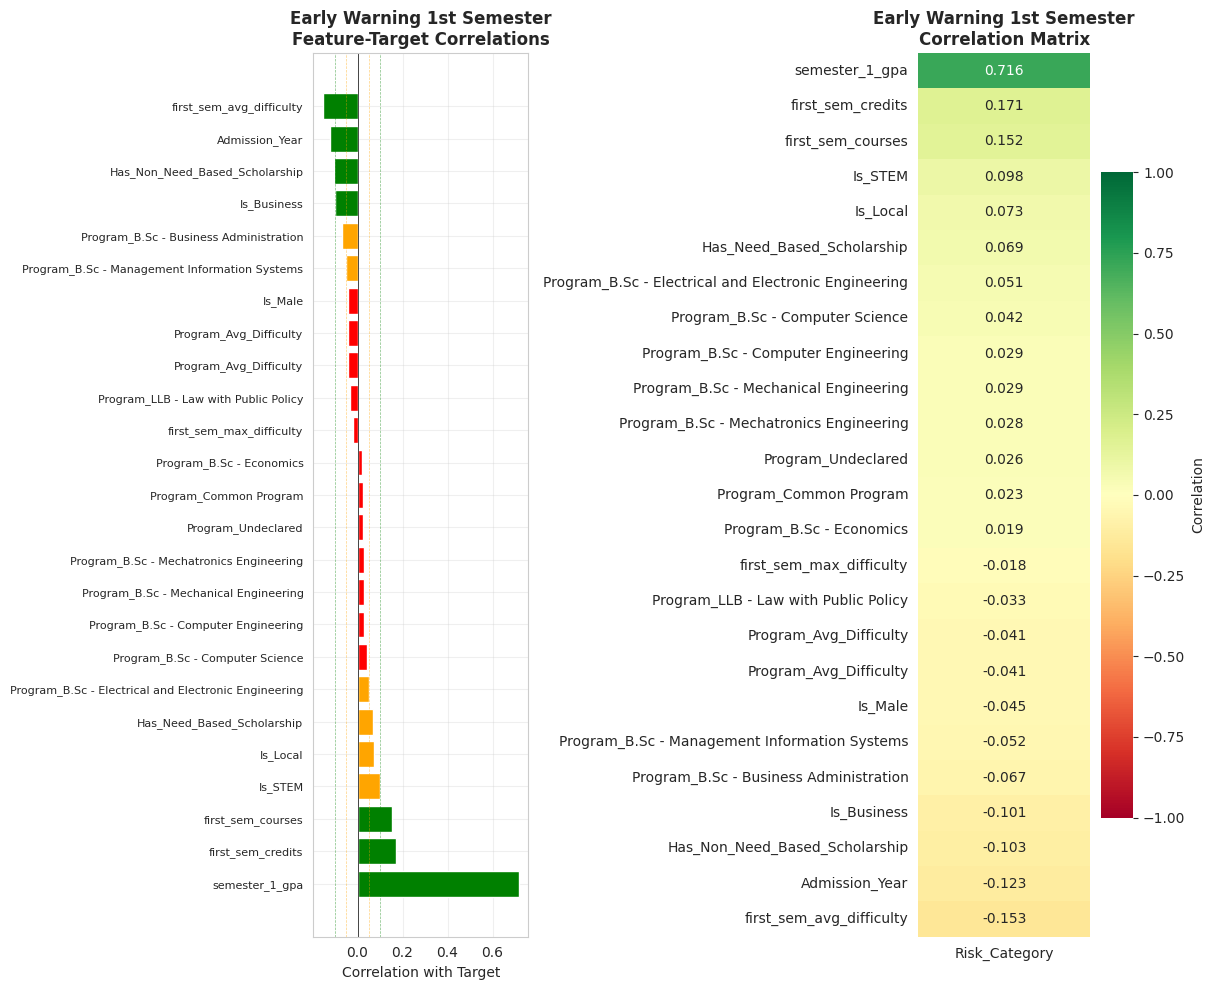

In [34]:
# Visualize
plot_correlation_heatmap(X_ews1, y_ews1, 
                         model_name='Early Warning 1st Semester',
                         target_name='Risk_Category')

## 4. Model 2: Early Warning System - 1st Year

In [35]:
# Load data
ews_1st_year = datasets['early_warning_1st_year']
X_ews2 = ews_1st_year['X']
y_ews2 = ews_1st_year['y_numeric']

print(f"Early Warning System - 1st Year")
print(f"Features: {X_ews2.shape[1]}")
print(f"Samples: {X_ews2.shape[0]}")
print(f"Target classes: {np.unique(y_ews2)}")
print(f"Class distribution:\n{pd.Series(y_ews2).value_counts().sort_index()}")

Early Warning System - 1st Year
Features: 30
Samples: 3618
Target classes: [0. 1. 2. 3.]
Class distribution:
Grade_Bin_Numeric
0.0     140
1.0     441
2.0    2297
3.0     740
Name: count, dtype: int64


In [36]:
# Analyze correlations
ews2_corr = analyze_feature_correlation(X_ews2, y_ews2, 
                                         model_name='Early Warning 1st Year',
                                         target_name='Risk_Category',
                                         correlation_threshold=0.05)

print("\nTop 10 Most Correlated Features:")
print(ews2_corr.head(10)[['Feature', 'Correlation', 'Abs_Correlation']].to_string(index=False))

summarize_weak_features(ews2_corr, threshold=0.05)


Top 10 Most Correlated Features:
                       Feature  Correlation  Abs_Correlation
           First_Year_Mean_GPA     0.763637         0.763637
                semester_2_gpa     0.699454         0.699454
                semester_1_gpa     0.687386         0.687386
            First_Year_GPA_Std    -0.300281         0.300281
first_year_avg_credits_per_sem     0.274920         0.274920
            first_year_credits     0.274920         0.274920
first_year_avg_courses_per_sem     0.272397         0.272397
            first_year_courses     0.272397         0.272397
     first_year_avg_difficulty    -0.243738         0.243738
                Admission_Year    -0.120055         0.120055

WEAK FEATURES (|correlation| < 0.05)
Total weak features: 11 / 30 (36.7%)

                                Feature  Correlation  Abs_Correlation
        Program_B.Sc - Computer Science     0.043138         0.043138
                 Program_Avg_Difficulty    -0.042383         0.042383
         

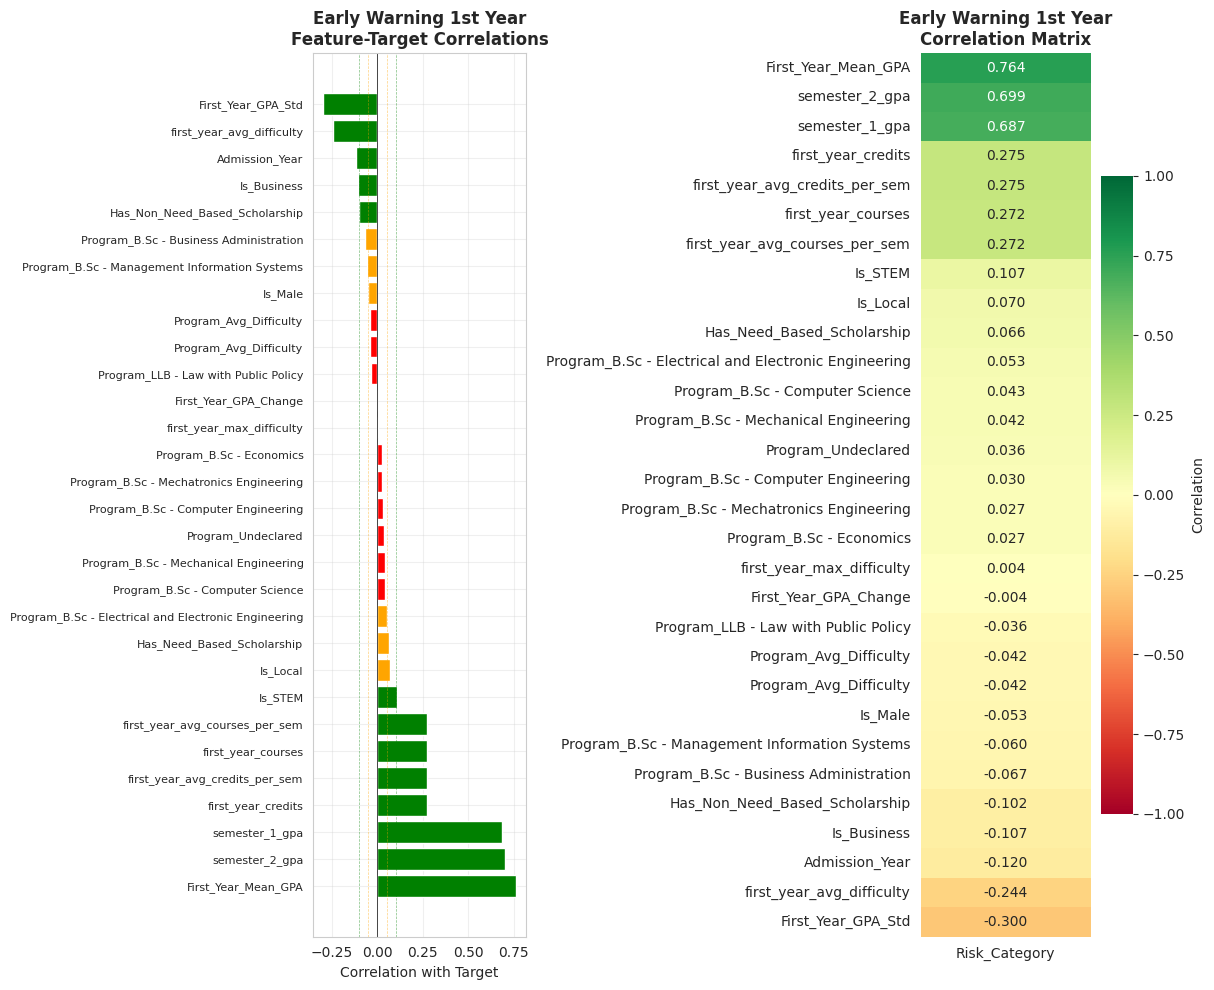

In [37]:
# Visualize
plot_correlation_heatmap(X_ews2, y_ews2, 
                         model_name='Early Warning 1st Year',
                         target_name='Risk_Category')

## 5. Model 3: Semester Probation Prediction

In [38]:
# Load data
probation_pred = datasets['semester_probation_prediction']
X_prob = probation_pred['X']
y_prob = probation_pred['y']

print(f"Semester Probation Prediction")
print(f"Features: {X_prob.shape[1]}")
print(f"Samples: {X_prob.shape[0]}")
print(f"Target classes: {np.unique(y_prob)}")
print(f"Class distribution:\n{pd.Series(y_prob).value_counts().sort_index()}")

Semester Probation Prediction
Features: 21
Samples: 20930
Target classes: [0 1]
Class distribution:
on_probation
0    20120
1      810
Name: count, dtype: int64


In [39]:
# Analyze correlations
prob_corr = analyze_feature_correlation(X_prob, y_prob, 
                                        model_name='Semester Probation Prediction',
                                        target_name='On_Probation',
                                        correlation_threshold=0.05)

print("\nTop 10 Most Correlated Features:")
print(prob_corr.head(10)[['Feature', 'Correlation', 'Abs_Correlation']].to_string(index=False))

summarize_weak_features(prob_corr, threshold=0.05)


Top 10 Most Correlated Features:
                        Feature  Correlation  Abs_Correlation
          last_sem_on_probation     0.684858         0.684858
       ever_on_probation_before     0.489635         0.489635
           num_prior_probations     0.462024         0.462024
             last_semester_cgpa    -0.443378         0.443378
                 mean_prior_gpa    -0.431461         0.431461
              last_semester_gpa    -0.377275         0.377275
                  min_prior_gpa    -0.330457         0.330457
      avg_prior_credits_per_sem    -0.166567         0.166567
      avg_prior_courses_per_sem    -0.128283         0.128283
recovered_from_probation_before     0.114692         0.114692

WEAK FEATURES (|correlation| < 0.05)
Total weak features: 5 / 21 (23.8%)

               Feature  Correlation  Abs_Correlation
Program_Avg_Difficulty     0.043631         0.043631
   semesters_completed    -0.038908         0.038908
     std_prior_courses     0.036140         0.0361

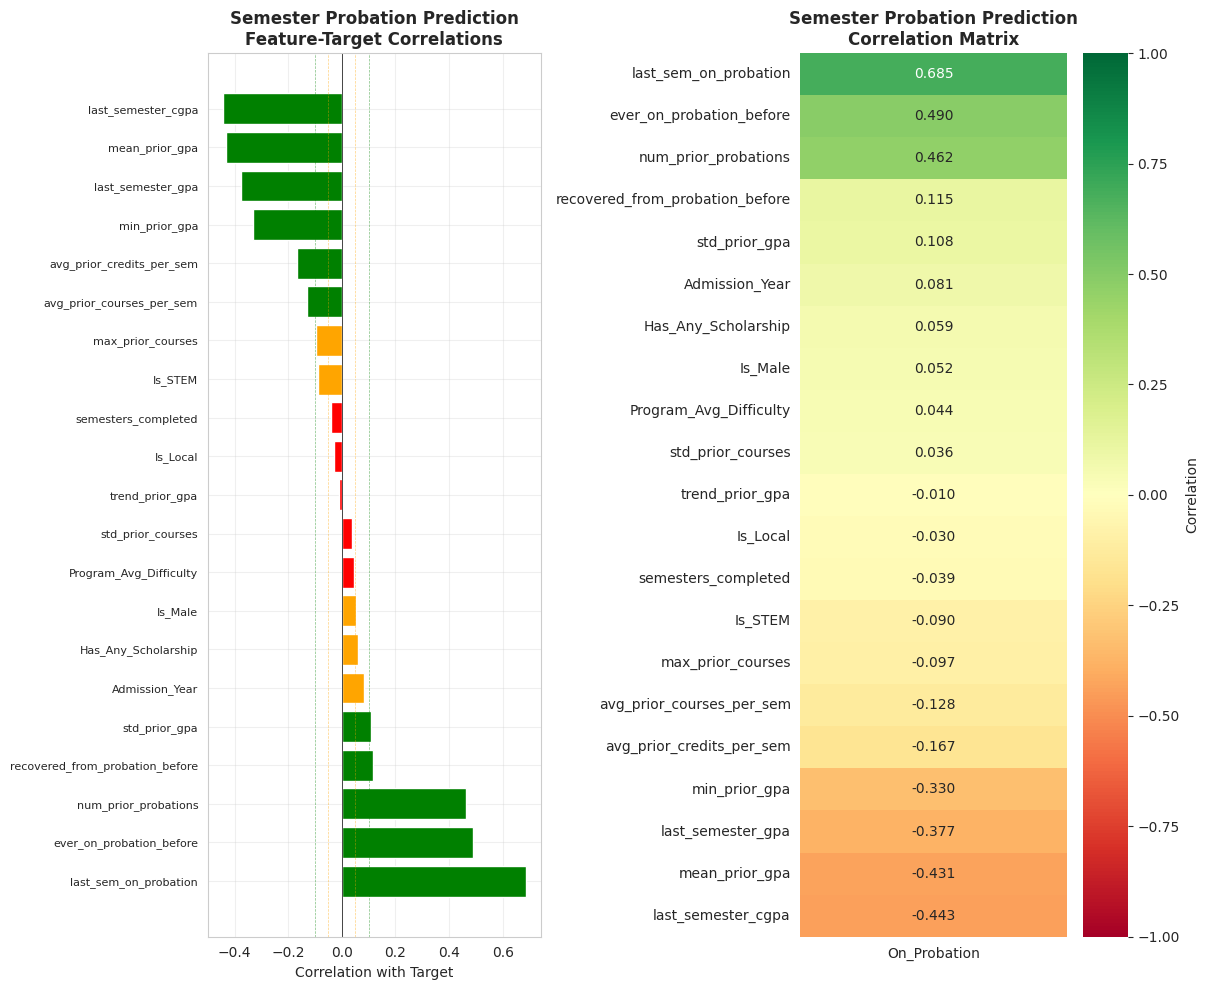

In [40]:
# Visualize
plot_correlation_heatmap(X_prob, y_prob, 
                         model_name='Semester Probation Prediction',
                         target_name='On_Probation')

## 6. Model 4: Academic Recovery Prediction

In [41]:
# Load data
recovery_pred = datasets['academic_recovery']
X_recov = recovery_pred['X']
y_recov = recovery_pred['y']

print(f"Academic Recovery Prediction")
print(f"Features: {X_recov.shape[1]}")
print(f"Samples: {X_recov.shape[0]}")
print(f"Target classes: {np.unique(y_recov)}")
print(f"Class distribution:\n{pd.Series(y_recov).value_counts().sort_index()}")

Academic Recovery Prediction
Features: 20
Samples: 937
Target classes: [0 1]
Class distribution:
recovered
0    608
1    329
Name: count, dtype: int64


In [42]:
# Analyze correlations
recov_corr = analyze_feature_correlation(X_recov, y_recov, 
                                         model_name='Academic Recovery Prediction',
                                         target_name='Recovered',
                                         correlation_threshold=0.05)

print("\nTop 10 Most Correlated Features:")
print(recov_corr.head(10)[['Feature', 'Correlation', 'Abs_Correlation']].to_string(index=False))

summarize_weak_features(recov_corr, threshold=0.05)


Top 10 Most Correlated Features:
                   Feature  Correlation  Abs_Correlation
            probation_cgpa     0.254540         0.254540
        is_first_probation     0.242279         0.242279
             probation_gpa     0.241195         0.241195
 mean_gpa_before_probation     0.201754         0.201754
       std_courses_per_sem    -0.199875         0.199875
       avg_courses_per_sem     0.175214         0.175214
      num_prior_probations    -0.130818         0.130818
                   Is_Male    -0.118981         0.118981
     semester_of_probation    -0.098963         0.098963
semesters_before_probation    -0.098963         0.098963

WEAK FEATURES (|correlation| < 0.05)
Total weak features: 6 / 20 (30.0%)

                        Feature  Correlation  Abs_Correlation
            Has_Any_Scholarship    -0.031489         0.031489
                        Is_STEM    -0.021737         0.021737
             trend_to_probation     0.009700         0.009700
                

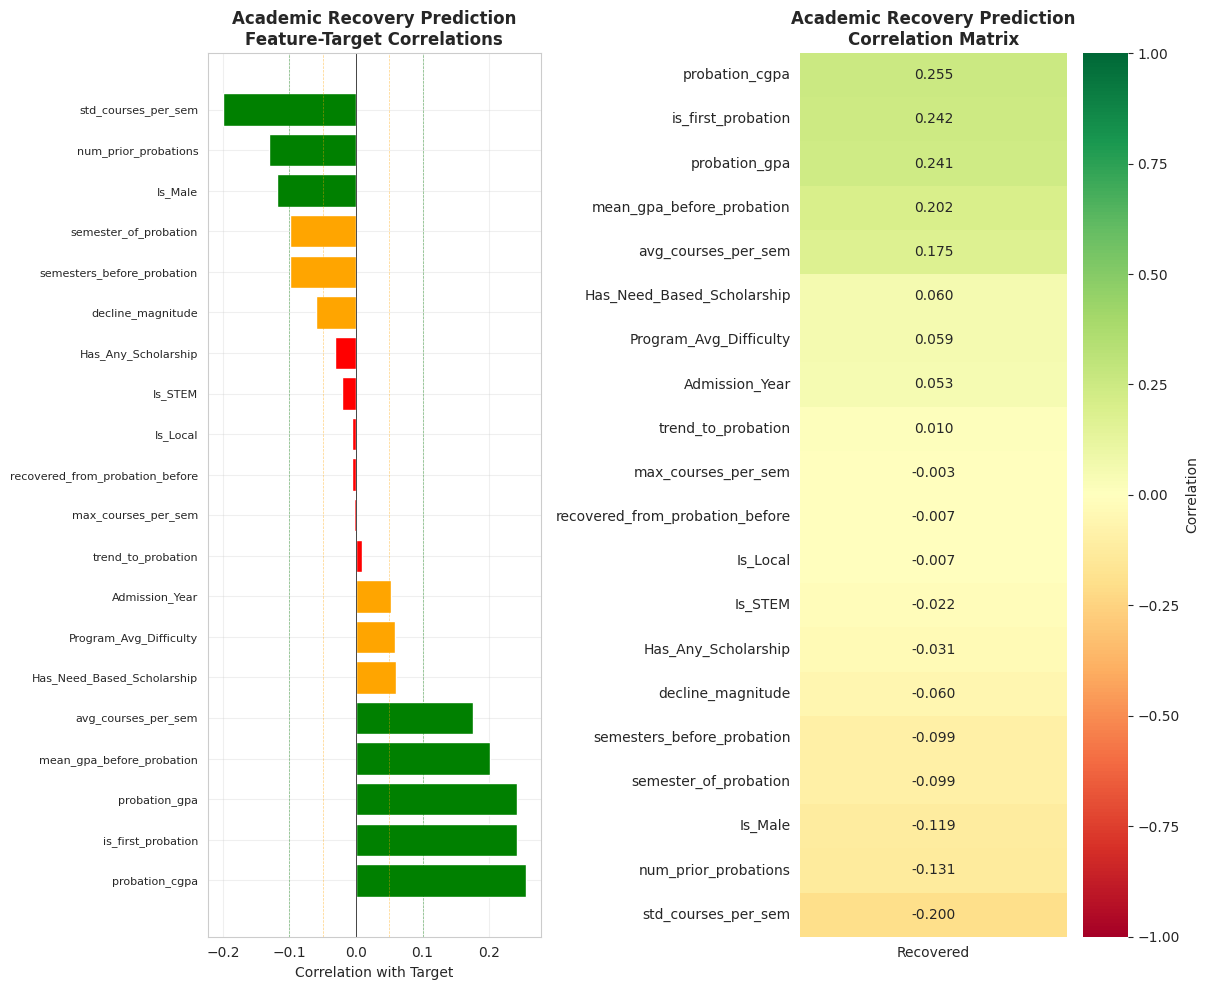

In [43]:
# Visualize
plot_correlation_heatmap(X_recov, y_recov, 
                         model_name='Academic Recovery Prediction',
                         target_name='Recovered')

## 7. Model 5: Next Semester GPA Change (Regression)

In [44]:
# Load data
gpa_change = datasets['next_semester_gpa_change']
X_gpa = gpa_change['X']
y_gpa = gpa_change['y']

print(f"Next Semester GPA Change")
print(f"Features: {X_gpa.shape[1]}")
print(f"Samples: {X_gpa.shape[0]}")
print(f"Target statistics:")
print(pd.Series(y_gpa).describe())

Next Semester GPA Change
Features: 14
Samples: 20930
Target statistics:
count    20930.000000
mean         0.013642
std          0.696496
min         -4.000000
25%         -0.310000
50%          0.000000
75%          0.340000
max          4.000000
Name: gpa_change, dtype: float64


In [45]:
# Analyze correlations
gpa_corr = analyze_feature_correlation(X_gpa, y_gpa, 
                                       model_name='Next Semester GPA Change',
                                       target_name='GPA_Change',
                                       correlation_threshold=0.05)

print("\nTop 10 Most Correlated Features:")
print(gpa_corr.head(10)[['Feature', 'Correlation', 'Abs_Correlation']].to_string(index=False))

summarize_weak_features(gpa_corr, threshold=0.05)


Top 10 Most Correlated Features:
                Feature  Correlation  Abs_Correlation
            current_gpa    -0.438651         0.438651
        current_courses     0.064577         0.064577
        current_credits     0.064416         0.064416
num_semesters_completed     0.045202         0.045202
      avg_prior_courses    -0.044669         0.044669
      std_prior_courses     0.037882         0.037882
                Is_STEM    -0.034597         0.034597
                Is_Male    -0.022156         0.022156
           recent_trend    -0.022064         0.022064
      recent_volatility     0.013277         0.013277

WEAK FEATURES (|correlation| < 0.05)
Total weak features: 11 / 14 (78.6%)

                Feature  Correlation  Abs_Correlation
num_semesters_completed     0.045202         0.045202
      avg_prior_courses    -0.044669         0.044669
      std_prior_courses     0.037882         0.037882
                Is_STEM    -0.034597         0.034597
                Is_Male   

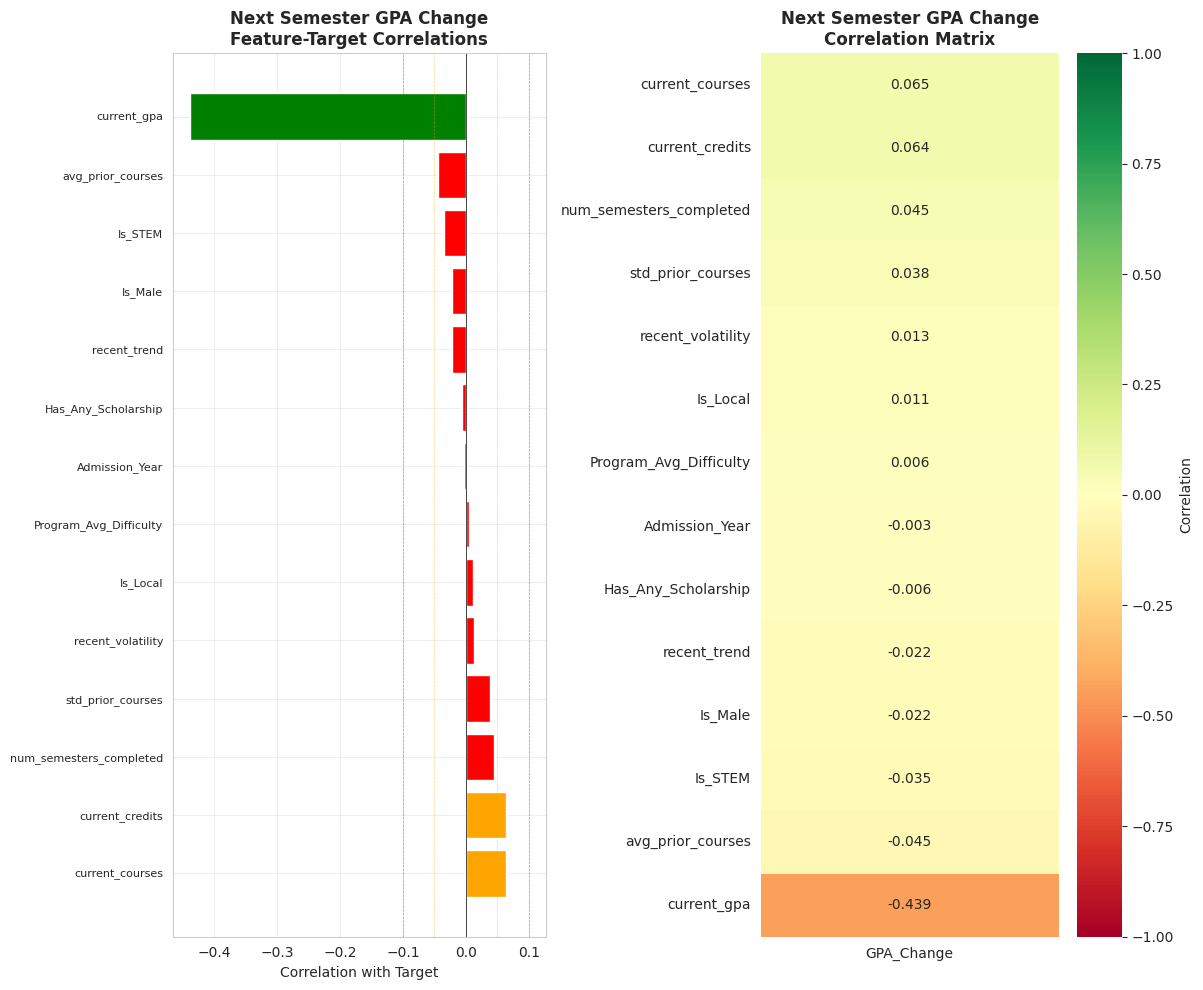

In [46]:
# Visualize
plot_correlation_heatmap(X_gpa, y_gpa, 
                         model_name='Next Semester GPA Change',
                         target_name='GPA_Change')

## 8. Model 6: STEM Course Success Prediction

In [47]:
# Load data
stem_success = datasets['stem_course_success']
X_stem = stem_success['X']
y_stem = stem_success['y']

print(f"STEM Course Success Prediction")
print(f"Features: {X_stem.shape[1]}")
print(f"Samples: {X_stem.shape[0]}")
print(f"Target classes: {np.unique(y_stem)}")
print(f"Class distribution:\n{pd.Series(y_stem).value_counts().sort_index()}")

STEM Course Success Prediction
Features: 30
Samples: 22997
Target classes: [0 1]
Class distribution:
Passed
0     4125
1    18872
Name: count, dtype: int64


In [48]:
# Analyze correlations
stem_corr = analyze_feature_correlation(X_stem, y_stem, 
                                        model_name='STEM Course Success Prediction',
                                        target_name='Passed',
                                        correlation_threshold=0.05)

print("\nTop 10 Most Correlated Features:")
print(stem_corr.head(10)[['Feature', 'Correlation', 'Abs_Correlation']].to_string(index=False))

summarize_weak_features(stem_corr, threshold=0.05)


Top 10 Most Correlated Features:
                          Feature  Correlation  Abs_Correlation
             Avg_Prior_Dept_Grade     0.581692         0.581692
                 Student_Mean_GPA     0.506077         0.506077
                     Student_CGPA     0.494461         0.494461
       avg_grade_in_prerequisites     0.427345         0.427345
       min_grade_in_prerequisites     0.395362         0.395362
           Num_Prior_Dept_Courses    -0.353649         0.353649
         Avg_Courses_Per_Semester     0.266247         0.266247
num_prerequisites_with_low_grades    -0.237732         0.237732
                 Course_Avg_Grade     0.233923         0.233923
                Course_Difficulty    -0.233923         0.233923

WEAK FEATURES (|correlation| < 0.05)
Total weak features: 11 / 30 (36.7%)

                                      Feature  Correlation  Abs_Correlation
Program_B.Sc - Management Information Systems    -0.036974         0.036974
                               Adm

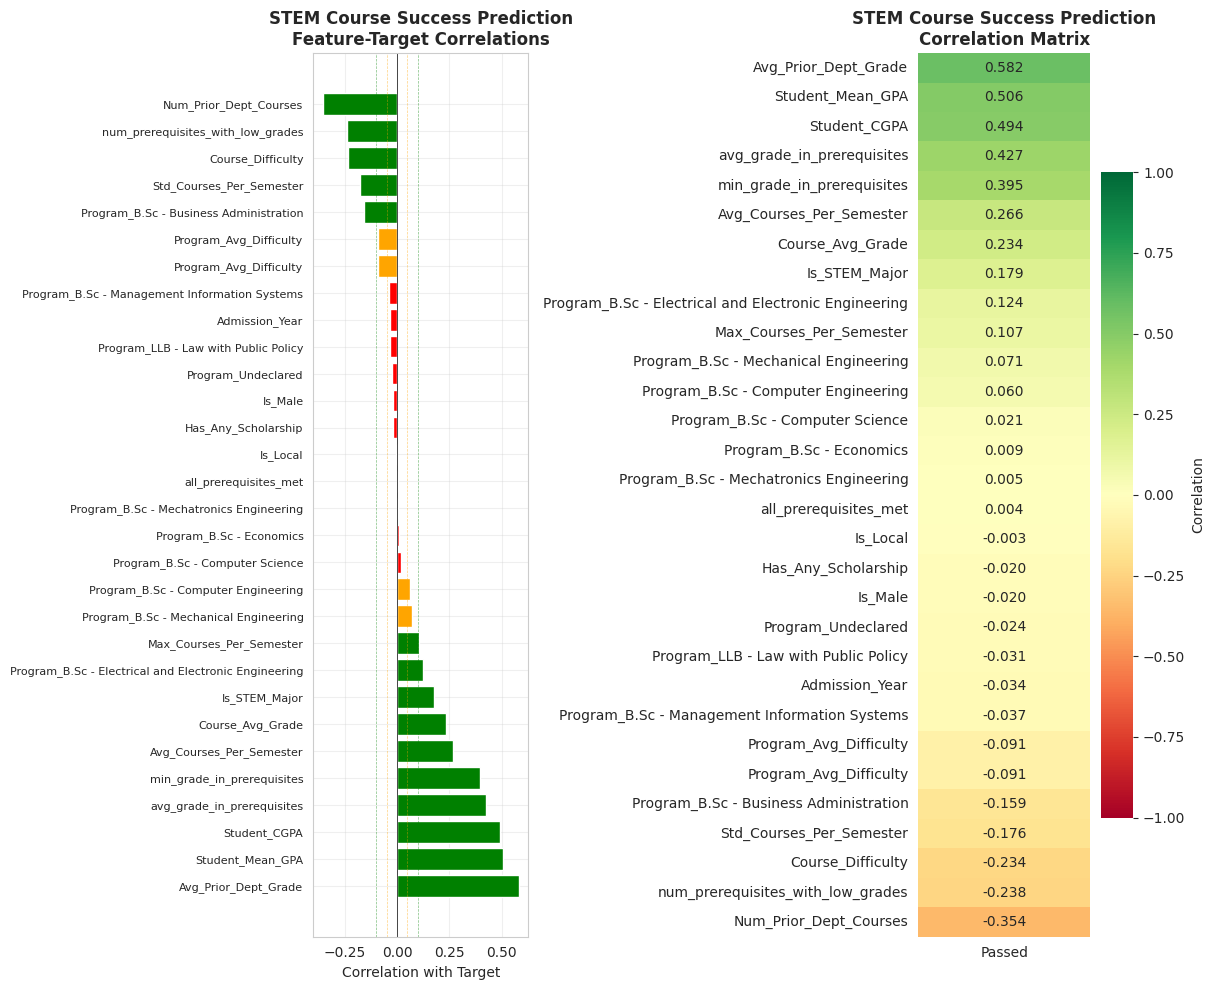

In [49]:
# Visualize
plot_correlation_heatmap(X_stem, y_stem, 
                         model_name='STEM Course Success Prediction',
                         target_name='Passed')

## 9. Summary: Comparison Across All Models

In [50]:
# Create summary table
summary_data = []

for model_name, corr_results in [
    ('Early Warning 1st Semester', ews1_corr),
    ('Early Warning 1st Year', ews2_corr),
    ('Semester Probation', prob_corr),
    ('Academic Recovery', recov_corr),
    ('GPA Change', gpa_corr),
    ('STEM Course Success', stem_corr)
]:
    summary_data.append({
        'Model': model_name,
        'Total Features': len(corr_results),
        'Weak Features (|r| < 0.05)': (corr_results['Abs_Correlation'] < 0.05).sum(),
        'Moderate Features (0.05 ≤ |r| < 0.1)': ((corr_results['Abs_Correlation'] >= 0.05) & (corr_results['Abs_Correlation'] < 0.1)).sum(),
        'Strong Features (|r| ≥ 0.1)': (corr_results['Abs_Correlation'] >= 0.1).sum(),
        'Max |Correlation|': corr_results['Abs_Correlation'].max(),
        'Avg |Correlation|': corr_results['Abs_Correlation'].mean()
    })

summary_df = pd.DataFrame(summary_data)

print("\n" + "="*100)
print("SUMMARY: Feature Correlation Analysis Across All Models")
print("="*100)
print(summary_df.to_string(index=False))
print("="*100)


SUMMARY: Feature Correlation Analysis Across All Models
                     Model  Total Features  Weak Features (|r| < 0.05)  Moderate Features (0.05 ≤ |r| < 0.1)  Strong Features (|r| ≥ 0.1)  Max |Correlation|  Avg |Correlation|
Early Warning 1st Semester              25                          12                                     6                            7           0.715689           0.092212
    Early Warning 1st Year              30                          11                                     6                           13           0.763637           0.164268
        Semester Probation              21                           5                                     5                           11           0.684858           0.203549
         Academic Recovery              20                           6                                     6                            8           0.254540           0.103733
                GPA Change              14                     

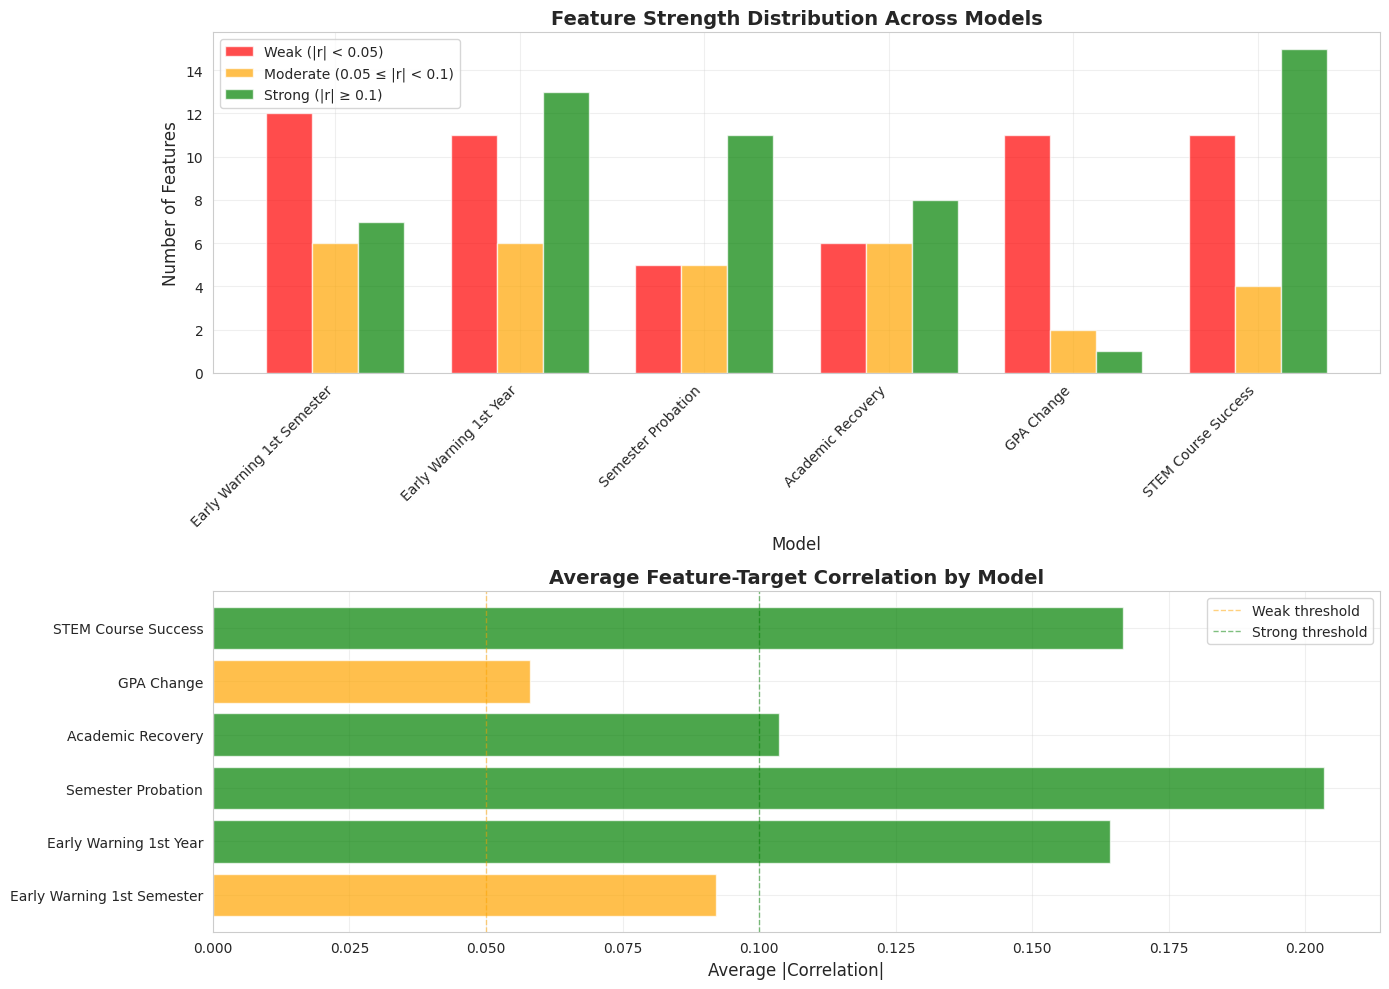


Visualization saved to: correlation_analysis/summary_comparison.png


In [51]:
# Visualize summary
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Feature strength distribution
x = np.arange(len(summary_df))
width = 0.25

axes[0].bar(x - width, summary_df['Weak Features (|r| < 0.05)'], width, label='Weak (|r| < 0.05)', color='red', alpha=0.7)
axes[0].bar(x, summary_df['Moderate Features (0.05 ≤ |r| < 0.1)'], width, label='Moderate (0.05 ≤ |r| < 0.1)', color='orange', alpha=0.7)
axes[0].bar(x + width, summary_df['Strong Features (|r| ≥ 0.1)'], width, label='Strong (|r| ≥ 0.1)', color='green', alpha=0.7)

axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('Number of Features', fontsize=12)
axes[0].set_title('Feature Strength Distribution Across Models', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(summary_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Average correlation strength
colors_avg = ['green' if x >= 0.1 else 'orange' if x >= 0.05 else 'red' for x in summary_df['Avg |Correlation|']]
axes[1].barh(summary_df['Model'], summary_df['Avg |Correlation|'], color=colors_avg, alpha=0.7)
axes[1].set_xlabel('Average |Correlation|', fontsize=12)
axes[1].set_title('Average Feature-Target Correlation by Model', fontsize=14, fontweight='bold')
axes[1].axvline(x=0.05, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Weak threshold')
axes[1].axvline(x=0.1, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Strong threshold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

# Save figure
output_dir = Path('correlation_analysis')
plt.savefig(output_dir / 'summary_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

print("\nVisualization saved to: correlation_analysis/summary_comparison.png")

## 10. Save Correlation Results

In [52]:
# Save all correlation results to CSV files
output_dir = Path('correlation_analysis')
output_dir.mkdir(exist_ok=True)

correlation_results = {
    'early_warning_1st_semester': ews1_corr,
    'early_warning_1st_year': ews2_corr,
    'semester_probation': prob_corr,
    'academic_recovery': recov_corr,
    'gpa_change': gpa_corr,
    'stem_course_success': stem_corr
}

for model_name, corr_df in correlation_results.items():
    corr_df.to_csv(output_dir / f'{model_name}_correlations.csv', index=False)
    print(f"Saved: {model_name}_correlations.csv")

# Save summary
summary_df.to_csv(output_dir / 'correlation_summary.csv', index=False)
print(f"\nSaved: correlation_summary.csv")

print("\nAll correlation analysis results saved to 'correlation_analysis/' directory")

Saved: early_warning_1st_semester_correlations.csv
Saved: early_warning_1st_year_correlations.csv
Saved: semester_probation_correlations.csv
Saved: academic_recovery_correlations.csv
Saved: gpa_change_correlations.csv
Saved: stem_course_success_correlations.csv

Saved: correlation_summary.csv

All correlation analysis results saved to 'correlation_analysis/' directory


## 11. Recommendations

Based on the correlation analysis, features with very weak correlations (|r| < 0.05) may be candidates for removal.

Things to note:

1. **Correlation ≠ Causation**: Low linear correlation doesn't mean the feature is useless. It might have non-linear relationships with the target.

2. **Feature Interactions**: Some features might not be individually predictive but important when combined with others.

3. **Domain Knowledge**: Features that make sense from a domain perspective should be kept even if correlation is low.

4. **Model Type**: Tree-based models can capture non-linear relationships better than linear models.

